# Theory behind Recommender systems:

Recommender systems are algorithms that could help customers to discover products such as movies or songs by predicting their ratings of the item and display similar items they like 

## What is User-based colloborative filter?

* User-based collaborative filtering works by building a matrix of every piece of content that users bought or viewed
* Similarity scores are calculated between users to find similar users to each others
* For similar users, content not viewed or bought are recommended to users that haven't seen them before

Limitations of user-based collaborative filter:
* There are more users (8 billion by theory) than products so it would be more complex
* The taste of customers could change over time

## What is item-based collaborative filter?

It is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items. Item-item collaborative filtering was invented and used by Amazon.com in 1998.

* It works by recommending elements based on items rather than poeple
* It could reduce the complexity of the problem comparing to user-based collaborative filteringg 
* Products features are stable comparing to users

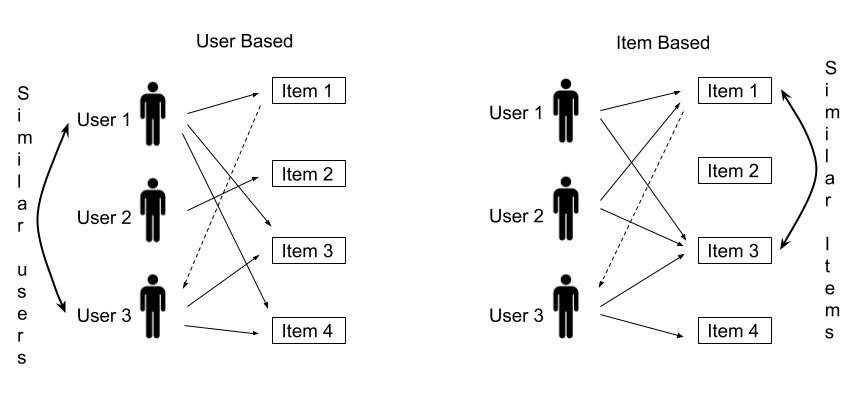

In [1]:
from IPython import display
display.Image("similarity.jpeg")

Reference: 
* https://levelup.gitconnected.com/the-mathematics-of-recommendation-systems-e8922a50bdea
* https://en.wikipedia.org/wiki/Item-item_collaborative_filtering

# About the Dataset

Dataset MovieLens: https://grouplens.org/datasets/movielens/100k/ 

MovieLens 100K movie ratings. Stable benchmark dataset. 100,000 ratings from 1000 users on 1700 movies. Released 4/1998.

# Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load and explore the dataset

In [3]:
movie_titles_df = pd.read_csv("Movie_Id_Titles")
movie_titles_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
# The second dataset is user ratings
movies_rating_df = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [5]:
movies_rating_df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
# drop the timestamp as it is not used
movies_rating_df.drop(['timestamp'], axis = 1, inplace = True)

In [7]:
movies_rating_df.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [8]:
# Look at the statistics of the dataset
movies_rating_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [9]:
movies_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [10]:
# merge the two datasets 
movies_rating_df = pd.merge(movies_rating_df, movie_titles_df, on = 'item_id') 

In [11]:
movies_rating_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [12]:
movies_rating_df.shape

(100003, 4)

# analyze and visualize the datasets

In [13]:
movies_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [14]:
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']

In [15]:
ratings_df_count = movies_rating_df.groupby('title')['rating'].describe()['count']

In [16]:
#concatenate the mean and count to create another dataframe
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis = 1)

In [17]:
ratings_mean_count_df.reset_index()

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


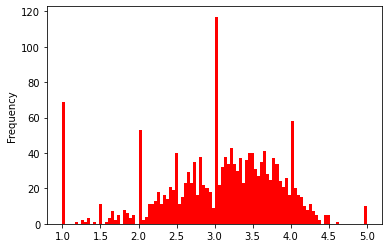

In [18]:
#visualize the rating means by using histograms
ratings_mean_count_df['mean'].plot(bins=100, kind='hist', color = 'r') 

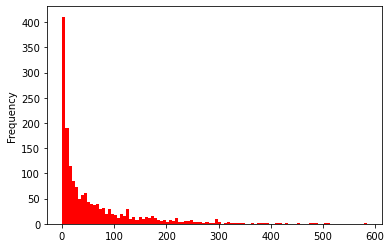

In [19]:
#visualize the counts by using histogram
ratings_mean_count_df['count'].plot(bins=100, kind='hist', color = 'r') 

In [20]:
# List the most rated movies by count
ratings_mean_count_df.sort_values('count', ascending = False).head(10)

,count,mean
title,,
Star Wars (1977),584.0,4.359589
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
"English Patient, The (1996)",481.0,3.656965
Scream (1996),478.0,3.441423
Toy Story (1995),452.0,3.878319
Air Force One (1997),431.0,3.631090


# perform item-based collaborative filtering 

In [21]:
userid_movietitle_matrix = movies_rating_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')


In [22]:
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
titanic = userid_movietitle_matrix['Titanic (1997)']


In [24]:
# calculate the correlations
titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic), columns=['Correlation'])
titanic_correlations = titanic_correlations.join(ratings_mean_count_df['count'])


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [25]:
titanic_correlations

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
...,...,...
Young Guns II (1990),0.317274,44.0
"Young Poisoner's Handbook, The (1995)",0.356783,41.0
Zeus and Roxanne (1997),NaN,6.0


In [26]:
titanic_correlations.dropna(inplace=True)
titanic_correlations

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0
...,...,...
Year of the Horse (1997),1.000000,7.0
Young Frankenstein (1974),0.107666,200.0
Young Guns (1988),0.199931,101.0


In [27]:
# sort the correlations vector
titanic_correlations.sort_values('Correlation', ascending=False)

,Correlation,count
title,,
Nadja (1994),1.0,8.0
"Pest, The (1997)",1.0,8.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
...,...,...
Pather Panchali (1955),-1.0,8.0
Angel Baby (1995),-1.0,4.0
Blood Beach (1981),-1.0,6.0


In [28]:
#filter out the correlation with movies that have more than 80 ratings
titanic_correlations[titanic_correlations['count']>80].sort_values('Correlation',ascending=False).head()

,Correlation,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0


In [29]:
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 80)
# pearson : standard correlation coefficient
# Obtain the correlations between all movies in the dataframe

In [30]:
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Recommend movies from our own ratings

In [31]:
myRatings = pd.DataFrame({"Movie Name":['12 Angry Men (1957)', 'Star Wars (1977)'], 'Ratings':[5, 4]})

In [32]:
myRatings

,Movie Name,Ratings
0,12 Angry Men (1957),5
1,Star Wars (1977),4


In [33]:
similar_movies_list = pd.Series()
for i in range(0, 2):
    similar_movie = movie_correlations[myRatings['Movie Name'][i]].dropna() # Get same movies with same ratings
    similar_movie = similar_movie.map(lambda x: x * myRatings['Ratings'][i]) # Scale the similarity by given ratings
    similar_movies_list = similar_movies_list.append(similar_movie)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [34]:
similar_movies_list.sort_values(inplace = True, ascending = False)
print (similar_movies_list.head(10))

12 Angry Men (1957)                                   5.000000
Star Wars (1977)                                      4.000000
Empire Strikes Back, The (1980)                       2.993410
Return of the Jedi (1983)                             2.690223
Raiders of the Lost Ark (1981)                        2.144468
Toy Story (1995)                                      1.674716
Austin Powers: International Man of Mystery (1997)    1.509731
Graduate, The (1967)                                  1.492894
Sting, The (1973)                                     1.470153
Indiana Jones and the Last Crusade (1989)             1.400428
dtype: float64
